In [112]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd
import math
import seaborn as sbn
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [122]:
data = pd.read_csv("zoo.csv")
data.head(4)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


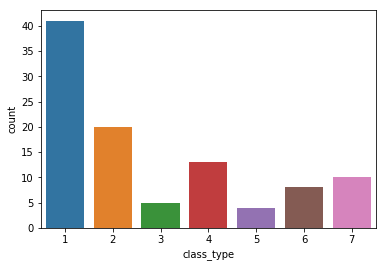

In [3]:
sbn.countplot(data['class_type'],label="Count")

Text(0.5, 1, 'Correlation of attributes')

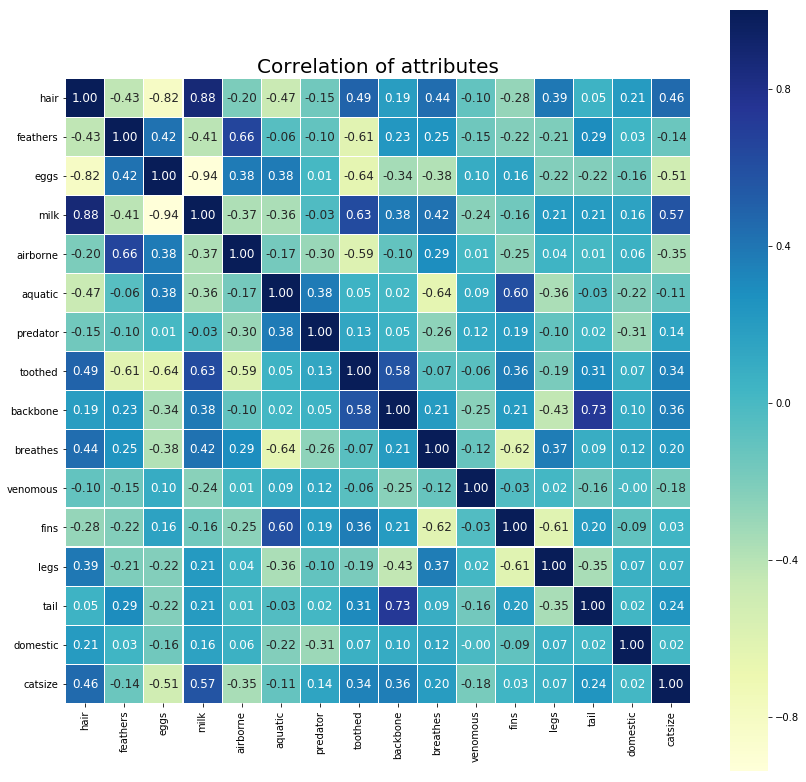

In [16]:
cordata = data.iloc[:,1:-1].corr()
plt.figure(figsize=(14,14))
sbn.heatmap(cordata, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            cmap="YlGnBu", linewidths=0.1, linecolor='white')
plt.title('Correlation of attributes', y=1, size=20) 

In [34]:
dataLegs = pd.DataFrame()
dataLegs = pd.get_dummies(data['legs'], sparse = True)
colLegsTitle = ['No legs','Two legs','Four legs','Five legs','Six legs','Eight legs']
dataLegs.columns = colLegsTitle
dataLegs.head()

,No legs,Two legs,Four legs,Five legs,Six legs,Eight legs
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [36]:
dataClassType = pd.DataFrame()
dataClassType = pd.get_dummies(data['class_type'],sparse=True)
colClassTitle = ['Mammal','Bird','Reptile','Fish','Amphibian','Bug','Invertebrate']
dataClassType.columns = colClassTitle
dataClassType.head()

,Mammal,Bird,Reptile,Fish,Amphibian,Bug,Invertebrate
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


Text(0.5, 1, 'Correlation of attributes')

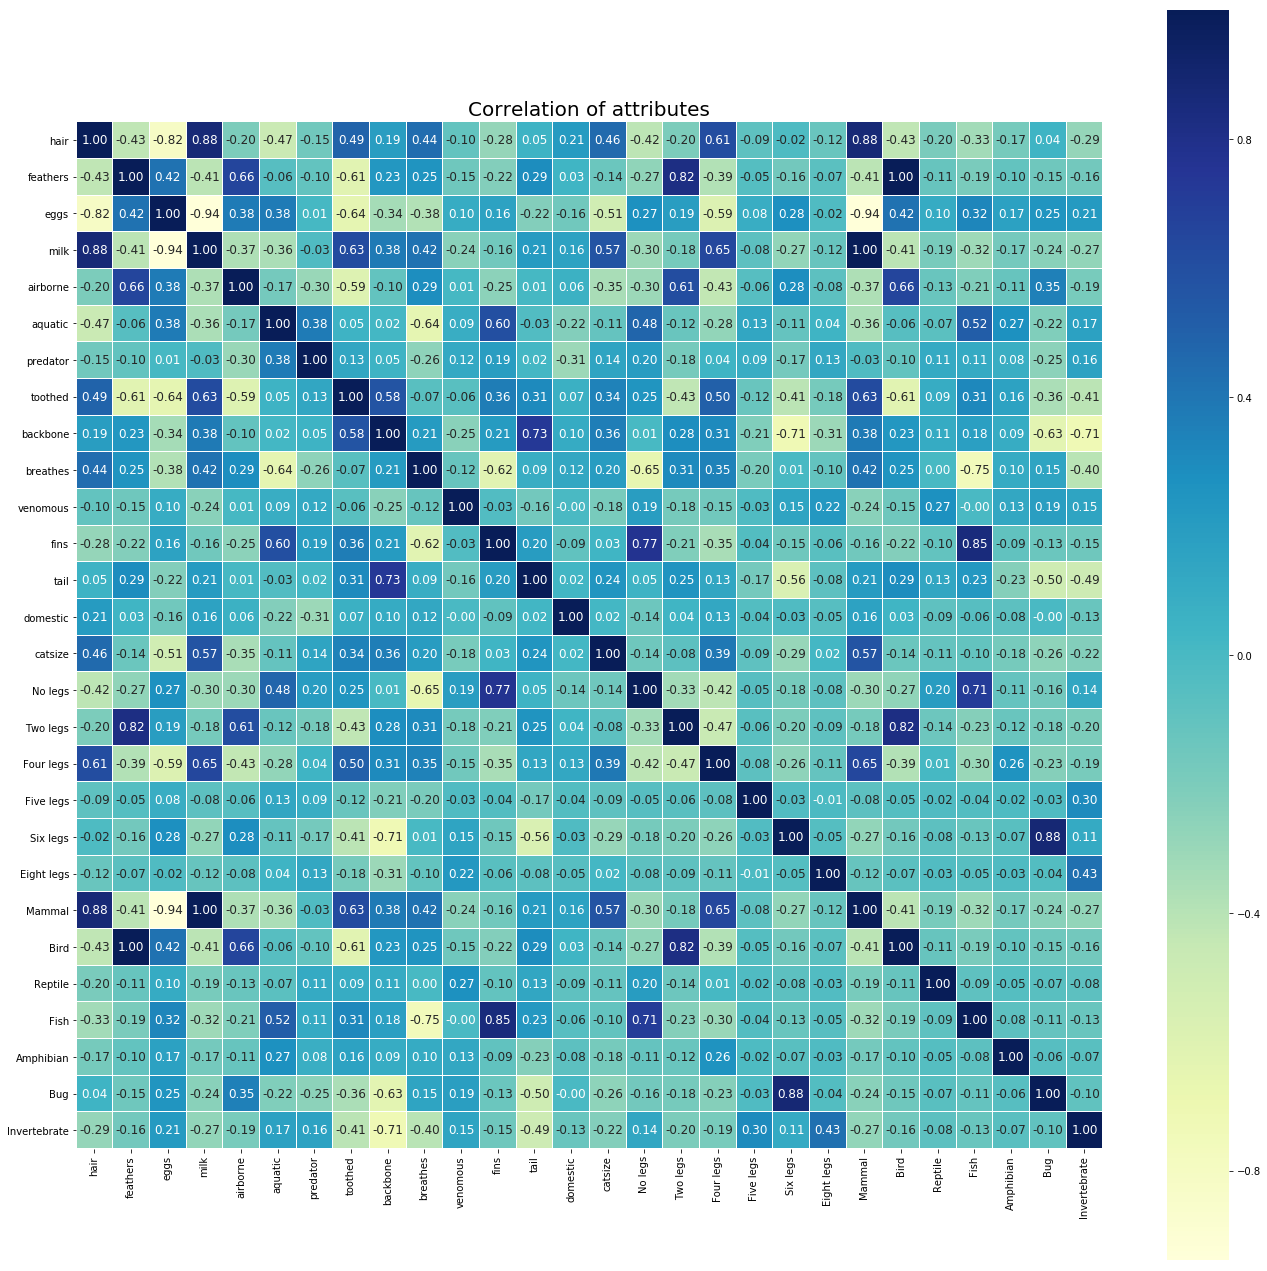

In [171]:
dataCorrelate = data.join(dataLegs)
dataCorrelate = dataCorrelate.join(dataClassType)
dataCorrelate = dataCorrelate.drop(['legs'],axis=1)
dataCorrelate = dataCorrelate.drop(['class_type'],axis=1)
dataCorrelate = dataCorrelate.corr()

plt.figure(figsize=(23,23))
sbn.heatmap(dataCorrelate, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            cmap="YlGnBu", linewidths=0.1, linecolor='white')
plt.title('Correlation of attributes', y=1, size=20) 

In [5]:

def preprocess(data):
    X = data.iloc[:, 1:17]  # all rows, all the features and no labels
    y = data.iloc[:, 17]  # all rows, label only

    return X, y

In [41]:
X, y = preprocess(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 16) (26, 16) (75,) (26,)


In [8]:
clf = svm.SVC()
clf.fit(X_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
clf.score(X_test, y_test)

0.8461538461538461

In [10]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9230769230769231

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9615384615384616

In [140]:
clfPredict = clf.predict(X_test)
print("Accuracy")
print(accuracy_score(clfPredict, y_test))
print("F1")
print(f1_score(clfPredict, y_test, average='weighted', labels=np.unique(clfPredict)))
print("Precision")
print(precision_score(clfPredict, y_test, average='weighted', labels=np.unique(clfPredict)))
print("Recall")
print(recall_score(clfPredict, y_test, average='weighted', labels=np.unique(clfPredict)))


Accuracy
0.8461538461538461
F1
0.8892144892144894
Precision
0.9711538461538461
Recall
0.8461538461538461


In [141]:

dtPredict = dt.predict(X_test)
print("Accuracy")
print(accuracy_score(dtPredict, y_test))
print("F1")
print(f1_score(dtPredict, y_test, average='weighted', labels=np.unique(dtPredict)))
print("Precision")
print(precision_score(dtPredict, y_test, average='weighted', labels=np.unique(dtPredict)))
print("Recall")
print(recall_score(dtPredict, y_test, average='weighted', labels=np.unique(dtPredict)))


Accuracy
0.9230769230769231
F1
0.9373626373626371
Precision
0.9711538461538461
Recall
0.9230769230769231


In [142]:
lrPredict = lr.predict(X_test)
print("Accuracy")
print(accuracy_score(lrPredict, y_test))
print("F1")
print(f1_score(lrPredict, y_test, average='weighted', labels=np.unique(lrPredict)))
print("Precision")
print(precision_score(lrPredict, y_test, average='weighted', labels=np.unique(lrPredict)))
print("Recall")
print(recall_score(lrPredict, y_test, average='weighted', labels=np.unique(lrPredict)))


Accuracy
0.9615384615384616
F1
0.9769230769230769
Precision
1.0
Recall
0.9615384615384616


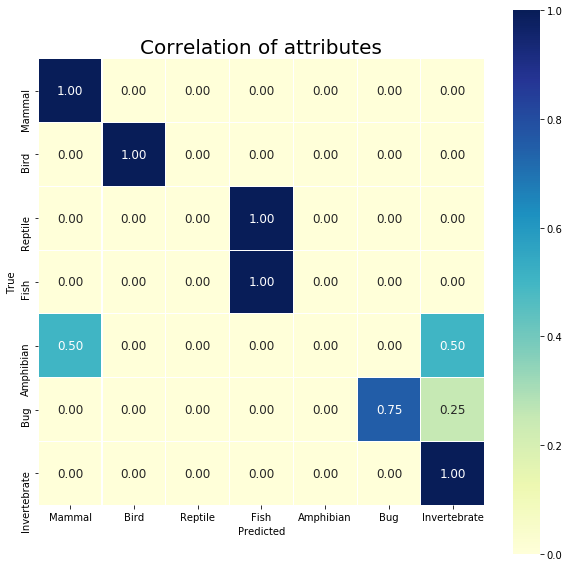

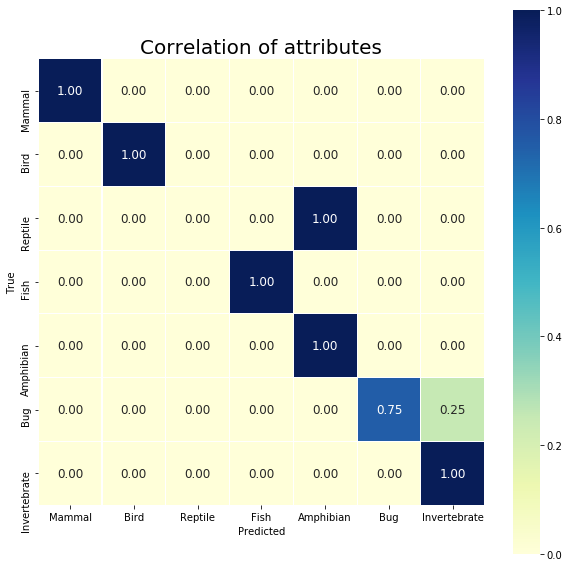

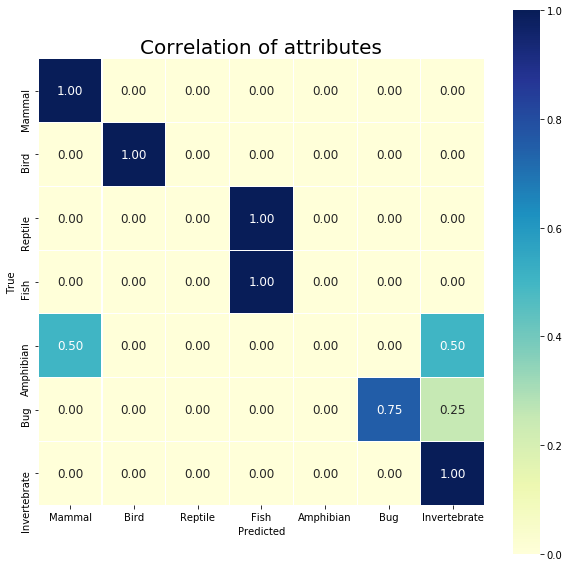

In [205]:
labels = colClassTitle
    
def plotCMHM(cm, label):
    fig = plt.figure(figsize=(10,10))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    hm = sbn.heatmap(cm, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12}, cmap="YlGnBu", linewidths=0.1, linecolor='white')
    hm.set(xticklabels=label, yticklabels=label)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Correlation of attributes', y=1, size=20) 

cmCLF = confusion_matrix(y_test, clfPredict, "Confusion Matrix for Support Vector Classi")
plotCMHM(cmCLF, labels)

cmDT = confusion_matrix(y_test, dtPredict, "Confusion Matrix for DecisionTreeClassifier")
plotCMHM(cmDT, labels)

cmLR = confusion_matrix(y_test, clfPredict, "Confusion Matrix for Logistic Regression")
plotCMHM(cmLR, labels)


